## SyriaTel Customer Churn Analysis

- Customer churn is a major issue for telecom companies, leading to revenue losses and increased customer acquisition costs. 
- This analysis aims to understand churn patterns and build a predictive model to help SyriaTel retain customers by identifying potential churners early and implementing targeted retention strategies.

## Business Understanding

- SyriaTel is experiencing high customer churn, impacting revenue and increasing operational costs.
- The goal is to build a predictive model to identify customers likely to churn and provide actionable insights.
- By analyzing customer behavior, usage patterns, and demographics, SyriaTel can implement data-driven retention strategies.

## Data Understanding

- The dataset contains customer details, service usage, and account information to help identify churn patterns.
- Understanding the data involves checking for missing values, data types, distributions, and potential biases.
- The dataset includes numerical and categorical variables such as: tenure, MonthlyCharges, Contract Type, and Payment Methods.
- Univariate analysis provides insights into individual features, while bivariate and multivariate analyses help understand relationships between features and churn.

In [58]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve
from collections import Counter

In [59]:
# Load the dataset
data = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

# Display the first few rows of the dataset
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [60]:
# copy the data
df = data.copy()

In [61]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [62]:
# Check the shape of the dataset
print("The shape of the dataset is:", df.shape)

The shape of the dataset is: (3333, 21)


In [63]:
# Check the column names
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [64]:
# Get basic statistics of the dataset
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [65]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [66]:
# Check for any duplicate rows
print("The number of duplicate rows:", df.duplicated().sum())

The number of duplicate rows: 0


In [67]:
# Check the data types of each column
print("Data types of each column:\n", df.dtypes)

Data types of each column:
 state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


#### Feature Engineering

In [68]:
# Create a new feature 'total minutes' by summing day, evening, and night minutes
df['total minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes']

# Create a new feature 'total calls' by summing day, evening, and night calls
df['total calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls']

# Create a new feature 'total charges' by summing day, evening, and night charges
df['total charges'] = df['total day charge'] + df['total eve charge'] + df['total night charge']

# Display the first few rows to verify the new feature
df[['total day charge', 'total eve charge', 'total night charge', 'total charges']].head()

,total day charge,total eve charge,total night charge,total charges
0,45.07,16.78,11.01,72.86
1,27.47,16.62,11.45,55.54
2,41.38,10.30,7.32,59.00
3,50.90,5.26,8.86,65.02
4,28.34,12.61,8.41,49.36


### Exploratory Data Analysis (EDA)

- EDA helps us understand the dataset by analyzing the distribution of individual features (univariate analysis), relationships between two variables (bivariate analysis), and overall correlations among multiple features (multivariate analysis).
- This step is crucial for identifying patterns, detecting outliers, and determining feature importance for modeling.

#### Univariate Analysis

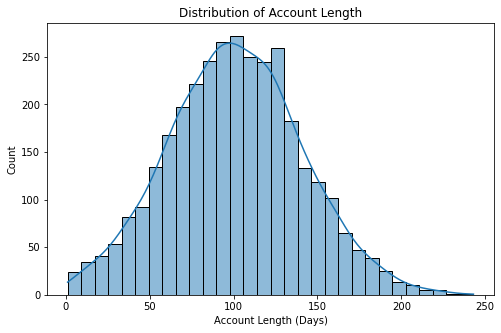

In [69]:
# Account Length distribution
plt.figure(figsize=(8,5))
sns.histplot(df['account length'], bins=30, kde=True)
plt.title('Distribution of Account Length')
plt.xlabel('Account Length (Days)')
plt.ylabel('Count');

#### Account length analysis

The histogram above shows the distribution of the account length feature, representing the number of days a customer has been with SyriaTel. 
The distribution appears right-skewed, meaning most customers have relatively short account lengths, but some have significantly longer durations.

##### Key Observations:

- The highest concentration of customers is around 90-110 days.
- There is a gradual decline in the number of customers as the account length increases.
- A small number of customers have remained with the company for more than 200 days.

> A shorter account length could indicate frequent churn, meaning customers might not be staying with the company for long.

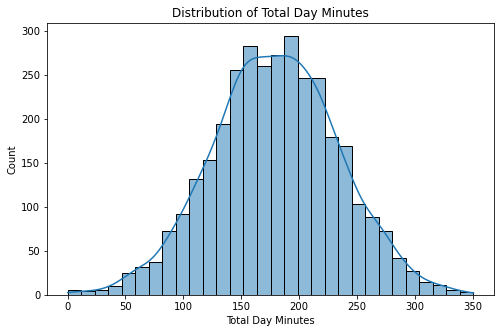

In [70]:
# Analyzing the distribution of total day minutes
plt.figure(figsize=(8,5))
sns.histplot(df['total day minutes'], bins=30, kde=True)
plt.title('Distribution of Total Day Minutes')
plt.xlabel('Total Day Minutes')
plt.ylabel('Count');

- The distribution appears approximately normal, with most customers having total day minutes between 100 and 250 minutes.

- The peak (mode) occurs around 175-200 minutes, meaning most customers fall within this range.

- There is slight right-skewness, suggesting some customers use significantly more minutes during the day.

- There are no extreme outliers, indicating that day-minute usage is fairly consistent across customers.

##### Distribution of Churn

Churn counts:
 False    2850
True      483
Name: churn, dtype: int64


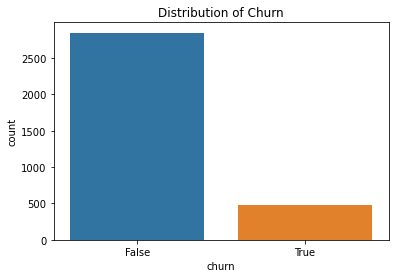

In [71]:
# Count of churned vs non-churned customers
churn_counts = df['churn'].value_counts()
print("Churn counts:\n", churn_counts)

# Plot the distribution of churn
sns.countplot(x='churn', data=df)
plt.title('Distribution of Churn');

- Majority of customers did not churn (2850), while 483 customers churned.
- Class imbalance is present, which may affect model performance.
- Potential revenue impact due to churned customers.

### Bivariate Analysis

international plan    0
voice mail plan       0
dtype: int64


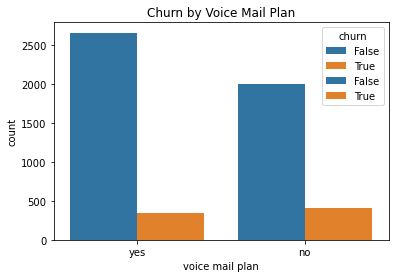

In [72]:
# Churn distribution by categorical features
# Check for missing values in categorical columns
categorical_features = ['international plan', 'voice mail plan']
print(df[categorical_features].isnull().sum())

# Churn by international plan
sns.countplot(x='international plan', hue='churn', data=df)
plt.title('Churn by International Plan');

# Churn by voice mail plan
sns.countplot(x='voice mail plan', hue='churn', data=df)
plt.title('Churn by Voice Mail Plan');

1. Churn by International Plan:
- Customers with an international plan have a higher churn rate compared to those without it.
- The proportion of churned customers is noticeably higher among those with an international plan.

2. Churn by Voice Mail Plan:
- Customers without a voice mail plan have a higher churn rate than those who have it. Having a voice mail plan seems to be associated with lower churn.
- These insights suggest that offering an international plan may be linked to customer dissatisfaction, while a voice mail plan could be a factor in customer retention.

##### Numerical Features vs. Churn

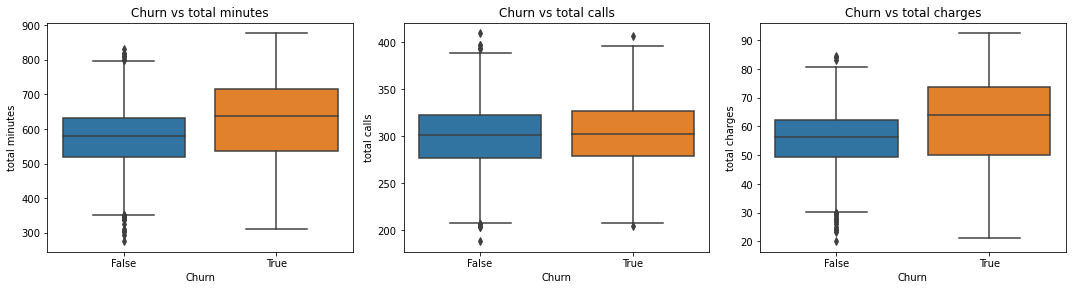

In [73]:
# List of numerical features to analyze
numerical_features = ["total minutes", "total calls", "total charges"]

# Plot boxplots to compare distributions
plt.figure(figsize=(15, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='churn', y=feature, data=df)
    plt.title(f'Churn vs {feature}')
    plt.xlabel('Churn')
    plt.ylabel(feature)
    plt.tight_layout();

Each boxplot compares the distribution of a numerical feature between churned and non-churned customers.

1. Churn vs Total Call Minutes (Day, Evening, Night, International):
- The boxplot indicates that churned customers tend to have higher total minutes across all time periods (day, evening, night, and international).

2. Churn vs Total Calls (Day, Evening, Night, International):
- The distribution of total calls is relatively similar between churned and non-churned customers.

3. Churn vs Total Charges (Day, Evening, Night, International):
- Churned customers generally have higher total charges in all categories.


##### Key Takeaways:
- Customers with high total minutes are at greater risk of churning, possibly due to cost concerns.
- The number of calls does not show a clear trend in churn, meaning it may not be a strong predictor.
- Higher total charges correlate with a higher churn rate, suggesting that pricing strategies and discounts for high-usage customers could help retain them.

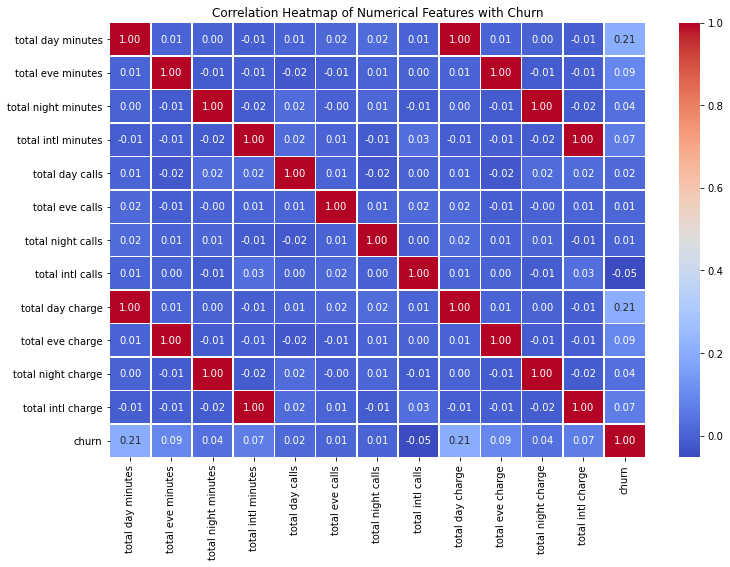

In [74]:
# Compute correlation matrix
correlation_matrix = df[['total day minutes', 'total eve minutes', 'total night minutes', 
                      'total intl minutes', 'total day calls', 'total eve calls', 
                      'total night calls', 'total intl calls', 'total day charge', 
                      'total eve charge', 'total night charge', 'total intl charge'] + ['churn']].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features with Churn');

- Total Day Minutes & Charge (~0.21 correlation) → Strongest predictors of churn.
- Evening, Night, International Minutes (≤0.09 correlation) → Weak relationship with churn.
- Total Calls (≈0 correlation) → No significant impact on churn.
- International Calls (-0.05 correlation) → More internationall calls, slightly lower churn.

> Day Minutes & Charge matter most for churn prediction.

### Multivariate Analysis

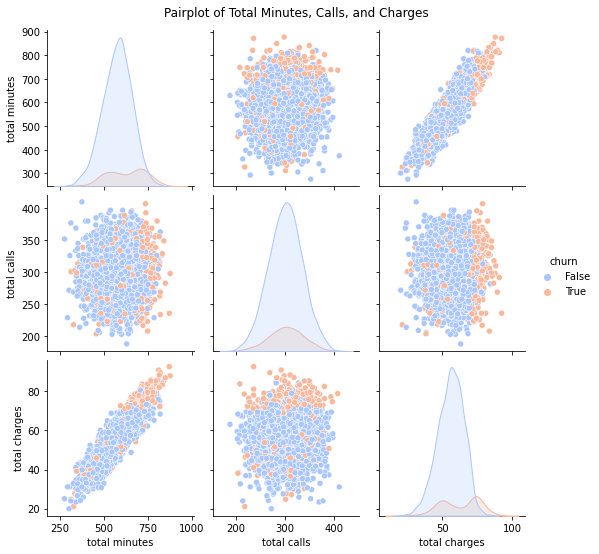

In [75]:
# Pairplot of new features
# Selecting key numerical features for pairplot
sns.pairplot(df, vars=['total minutes', 'total calls', 'total charges'], hue='churn', palette='coolwarm')
plt.suptitle("Pairplot of Total Minutes, Calls, and Charges", y=1.02);

1. **Total Minutes vs. Total Calls**:  
   - There is no clear relationship between total minutes and total calls.  
   - Churned (orange) and non-churned (blue) customers are evenly distributed, suggesting total calls alone may not be a strong predictor of churn.

2. **Total Minutes vs. Total Charges**:  
   - A strong positive correlation is observed, as expected (charges increase with minutes).  
   - Churned customers seem to have higher total minutes and total charges.

3. **Total Calls vs. Total Charges**:  
   - No clear trend is visible, implying total calls are not directly linked to charges.  
   - Churned customers do not show a distinct pattern in this relationship.

4. **Density Distribution**:  
   - Churned customers tend to have a lower density in total minutes and total charges, indicating higher usage might be a risk factor for churn.  
   - Most customers (blue) fall within a normal range, but churners (orange) are slightly more spread out.

### Conclusion:
- Total minutes and total charges are highly correlated, making one redundant in modeling.  
- Total calls do not show a strong link to churn and may not be a useful predictor alone.  
- Churners seem to have higher usage patterns, indicating a possible pricing or service-related issue.

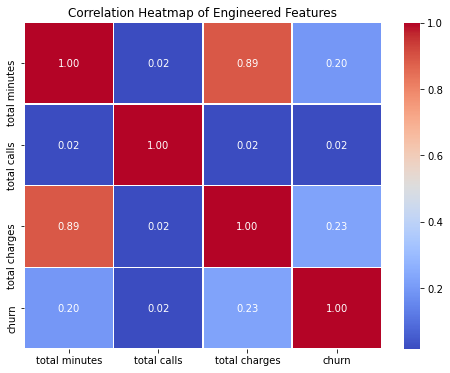

In [76]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
corr = df[['total minutes', 'total calls', 'total charges', 'churn']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Engineered Features");

- The heatmap shows that **total minutes** and **total charges** are highly correlated (0.89), which may cause multicollinearity.
- **Churn** has a weak positive correlation with **total minutes (0.20)** and **total charges (0.23)**, suggesting that higher usage slightly increases churn risk. 
- **Total calls** has almost no correlation with churn (0.02), making it a weak predictor.

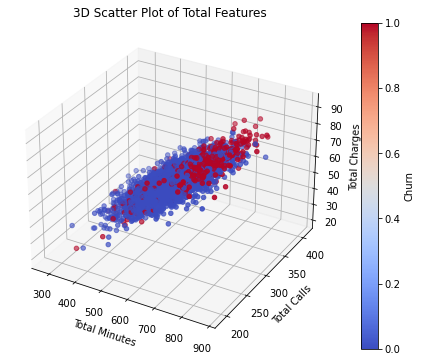

In [77]:
# 3D Scatter Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['total minutes'], df['total calls'], df['total charges'], c=df['churn'], cmap='coolwarm')
ax.set_xlabel("Total Minutes")
ax.set_ylabel("Total Calls")
ax.set_zlabel("Total Charges")
ax.set_title("3D Scatter Plot of Total Features")
plt.colorbar(sc, label="Churn");

- The 3D scatter plot visualizes the relationship between **total minutes, total calls, and total charges**, with **churn** represented by color (blue for non-churn, red for churn). 
- The plot shows a strong correlation between **total minutes and total charges**, as expected. 
- Churned customers (red points) seem more concentrated at higher values of **total minutes and total charges**, suggesting that customers with higher usage are more likely to churn. 
- However, **total calls do not show a strong pattern with churn**, aligning with the correlation heatmap findings.

In [78]:
# Save the cleaned dataset
df.to_csv('cleaned_telecom_data.csv', index=False)

## Data Preprocessing

#### Preparing the Data for Modeling
Separate Features and Target Variable
- We need to separate the features (independent variables) from the target variable (churn).

In [79]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['churn'])
y = df['churn'] 

Encode Categorical Variables

In [80]:
# Identifying categorical columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
print("Categorical columns:", categorical_cols)

# Encode categorical variables
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded dataset
X.head()

Categorical columns: Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,phone number_422-5874,phone number_422-6685,phone number_422-6690,phone number_422-7728,phone number_422-8268,phone number_422-8333,phone number_422-8344,phone number_422-9964,international plan_yes,voice mail plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,0,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,0,1,0


In [81]:
# Feature Importance Analysis
# Train a simple Random Forest model (temporary)
rf_temp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_temp.fit(X, y)

# Get feature importance (This helps evaluate which features contribute the most to the classification task.)
feature_importances = pd.Series(rf_temp.feature_importances_, index=X.columns)
important_features = feature_importances[feature_importances > 0.01]  # Keeping features above 1% importance

# Keep only important features
X_selected = X[important_features.index]

print("Selected Features:", X_selected.columns)


Selected Features: Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'total minutes', 'total calls', 'total charges',
       'international plan_yes', 'voice mail plan_yes'],
      dtype='object')


In [82]:
# Update X to only use selected features
X = X_selected

Split the Data into Training and Testing Sets

In [83]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (2666, 20) (2666,)
Testing set shape: (667, 20) (667,)


### Building a model 
#### 1. Logistic Regression

In [84]:
# Initialize the model
model = LogisticRegression(random_state=42, max_iter=5000)

# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=42)

#### Make Predictions

In [85]:
# Make predictions
y_pred = model.predict(X_test)

# Display first 10 predictions
print("Predicted churn values:", y_pred[:10])

Predicted churn values: [False False False False False False False False False False]


#### Evaluating the Model
##### Confusion Matrix

Confusion Matrix:
 [[554  12]
 [ 85  16]]


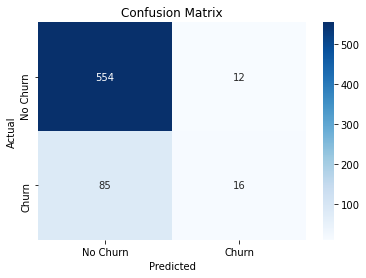

In [86]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual');

#### Classification Report

In [87]:
# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Set custom threshold for better recall
best_threshold = 0.4  # Adjust based on ROC curve analysis
y_pred_adjusted = (y_probs > best_threshold).astype(int)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred_adjusted)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.97      0.92       566
        True       0.61      0.27      0.37       101

    accuracy                           0.86       667
   macro avg       0.75      0.62      0.65       667
weighted avg       0.84      0.86      0.84       667



#### Observations on Model Performance:
- Accuracy: 86% (Good overall, but accuracy isn’t the best metric here.)
- Precision for Churn (True): 0.61 (Not great; too many false positives.)
- Recall for Churn (True): 0.27 (Very low, meaning the model is missing actual churn cases.)
- F1-score for Churn: 0.37 (Low, indicating poor balance between precision and recall.)
> The model struggles to detect actual churn cases (high false negatives). This is why recall is very low.

#### ROC Curve and AUC

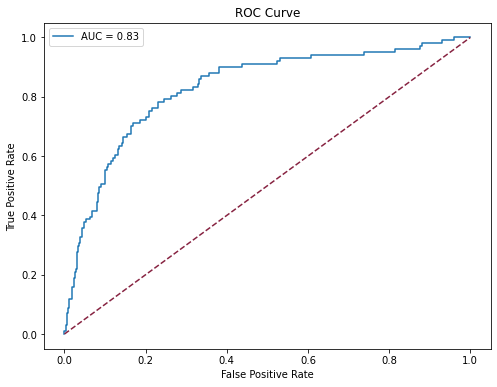

In [88]:
# Compute predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='#872341')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend();

The ROC curve and AUC (Area Under the Curve) evaluate the model's ability to distinguish between classes:

- AUC Score: 0.83

- ROC Curve: The curve is above the diagonal line, indicating that the model performs better than random guessing.

**Apply SMOTE**

In [89]:
# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Class distribution after SMOTE:\n", y_train_resampled.value_counts())

Class distribution after SMOTE:
 False    2284
True     2284
Name: churn, dtype: int64


**Retrain the Model with Resampled Data**

In [90]:
# Initialize the model with regularization tuning
model = LogisticRegression(random_state=42, max_iter=5000, C=0.1)  # Adjust C for better generalization

# Train the model on resampled data
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=0.1, max_iter=5000, random_state=42)

In [91]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [92]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[534  32]
 [ 60  41]]


In [93]:
# Predict probabilities and apply the threshold
y_probs = model.predict_proba(X_test)[:, 1]
best_threshold = 0.4  # You can adjust this based on ROC curve
y_pred_adjusted = (y_probs > best_threshold).astype(int)

In [94]:
# Generate and print the classification report
class_report = classification_report(y_test, y_pred_adjusted)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.88      0.90       566
        True       0.46      0.58      0.52       101

    accuracy                           0.83       667
   macro avg       0.69      0.73      0.71       667
weighted avg       0.85      0.83      0.84       667



#### Observations on the Improved Model:
- Recall for Churn (True): 0.58 (Increased from 0.27)
- Precision for Churn (True): 0.46 (Dropped slightly from 0.61, but that’s expected.)
- F1-score for Churn: 0.52 (Significant improvement from 0.37)
- Overall Accuracy: 83% (Still solid, but accuracy isn’t our main focus.)

#### Tune the Threshold Further

In [95]:
# Get precision-recall tradeoff values
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Find the threshold where precision and recall are balanced
best_index = (precisions - recalls).argmin()
optimal_threshold = thresholds[best_index]

print("Optimal Threshold:", optimal_threshold)

# Apply new threshold
y_pred_optimized = (y_probs > optimal_threshold).astype(int)

# Print new classification report
print("Classification Report with Optimized Threshold:\n", classification_report(y_test, y_pred_optimized))


Optimal Threshold: 0.007746160018885038
Classification Report with Optimized Threshold:
               precision    recall  f1-score   support

       False       1.00      0.00      0.00       566
        True       0.15      1.00      0.26       101

    accuracy                           0.15       667
   macro avg       0.58      0.50      0.13       667
weighted avg       0.87      0.15      0.04       667



In [96]:
# Try different threshold values
thresholds = [0.2, 0.3, 0.35, 0.4, 0.5]
for t in thresholds:
    y_pred_t = (y_probs > t).astype(int)
    print(f"\nThreshold: {t}")
    print(classification_report(y_test, y_pred_t))


Threshold: 0.2
              precision    recall  f1-score   support

       False       0.97      0.56      0.71       566
        True       0.27      0.91      0.42       101

    accuracy                           0.61       667
   macro avg       0.62      0.74      0.56       667
weighted avg       0.87      0.61      0.67       667


Threshold: 0.3
              precision    recall  f1-score   support

       False       0.95      0.75      0.84       566
        True       0.35      0.76      0.48       101

    accuracy                           0.75       667
   macro avg       0.65      0.76      0.66       667
weighted avg       0.86      0.75      0.78       667


Threshold: 0.35
              precision    recall  f1-score   support

       False       0.94      0.82      0.88       566
        True       0.42      0.71      0.53       101

    accuracy                           0.81       667
   macro avg       0.68      0.77      0.70       667
weighted avg       0.86  

### Trying other models

#### 2. Decision tree Model

In [97]:
# Initialize and train a basic Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_probs_dt = dt.predict_proba(X_test)[:, 1]
y_pred_dt = (y_probs_dt > 0.35).astype(int)

# Evaluate the model
print("Classification Report for Basic Decision Tree:\n", classification_report(y_test, y_pred_dt))

Classification Report for Basic Decision Tree:
               precision    recall  f1-score   support

       False       0.97      0.89      0.93       566
        True       0.58      0.86      0.69       101

    accuracy                           0.88       667
   macro avg       0.78      0.88      0.81       667
weighted avg       0.91      0.88      0.89       667



- **Accuracy:** 88% – The model correctly predicted 88% of cases.
- **Non-Churn (False):** High precision (0.97) and recall (0.89) → Good at identifying non-churn customers.
- **Churn (True):** High recall (0.86) but low precision (0.58) → Catches most churn cases but misclassifies some non-churn customers.
- **Issue:** Model favors recall for churn but lacks precision, leading to false positives.
> We have to tune the model 

In [98]:
# Define parameter grid for tuning
param_dist = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Perform Randomized Search for hyperparameter tuning
dt_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=20, cv=5, scoring='f1', verbose=2, n_jobs=-1, random_state=42)
dt_search.fit(X_train_resampled, y_train_resampled)

# Best parameters
print("Best Parameters for Decision Tree:", dt_search.best_params_)

# Train the best Decision Tree model
best_dt = dt_search.best_estimator_
y_probs_dt = best_dt.predict_proba(X_test)[:, 1]
y_pred_dt = (y_probs_dt > 0.35).astype(int)

# Evaluate the tuned model
print("Classification Report for Tuned Decision Tree:\n", classification_report(y_test, y_pred_dt))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40, 'criterion': 'entropy'}
Classification Report for Tuned Decision Tree:
               precision    recall  f1-score   support

       False       0.98      0.91      0.94       566
        True       0.64      0.87      0.74       101

    accuracy                           0.91       667
   macro avg       0.81      0.89      0.84       667
weighted avg       0.93      0.91      0.91       667



**Tuned Decision Tree Performance:** 


- **Accuracy: 91%** – Slight improvement after tuning. 


- **Non-Churn (False):** Higher precision (0.98) and recall (0.91) → Better at identifying non-churn customers.  


- **Churn (True):** Recall improved to 0.87, meaning more churn cases are caught, but precision (0.64) is still low, leading to false positives.  


- **Overall:** Better than the basic model but not the final choice.

#### 3. Random Forest Model

In [99]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')

# Train on resampled data
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]

# Apply the chosen threshold (0.35 for now)
y_pred_rf = (y_probs_rf > 0.35).astype(int)

# Print classification report
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))

Classification Report for Random Forest:
               precision    recall  f1-score   support

       False       0.98      0.94      0.96       566
        True       0.73      0.87      0.80       101

    accuracy                           0.93       667
   macro avg       0.85      0.91      0.88       667
weighted avg       0.94      0.93      0.93       667



**Here’s a summary of the Random Forest model’s performance:**


- **Accuracy: 93%** → Overall, the model is highly accurate.


- **Precision (Churn = Yes):** 73% → When the model predicts churn, it’s correct 73% of the time.


- **Recall (Churn = Yes):** 87% → The model catches 87% of actual churn cases.


- **F1-score (Churn = Yes):** 80% → A great balance of precision & recall.

Confusion Matrix:
 [[534  32]
 [ 13  88]]


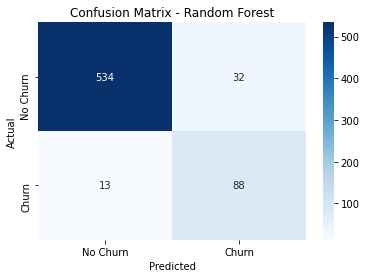

In [100]:
# Compute confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Confusion Matrix:\n", conf_matrix_rf)
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual');

Observations:
- 534 True Negatives (TN): Correctly predicted customers who did not churn.
- 88 True Positives (TP): Correctly predicted customers who churned.
- 32 False Positives (FP): Mistakenly classified 32 loyal customers as churners.
- 13 False Negatives (FN): Missed only 13 actual churners.

This confusion matrix confirms that Random Forest is a strong model, significantly reducing missed churn cases while maintaining good precision.


However, we have to try and tune the model.

In [101]:
# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search
rf_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=5, scoring='f1', verbose=2, n_jobs=-1, random_state=42)
rf_search.fit(X_train_resampled, y_train_resampled)

# Best parameters
print("Best Parameters for Random Forest:", rf_search.best_params_)

# Train best model
best_rf = rf_search.best_estimator_
y_probs_rf = best_rf.predict_proba(X_test)[:, 1]
y_pred_rf = (y_probs_rf > 0.35).astype(int)

# Evaluate model
print("Classification Report for Tuned Random Forest:\n", classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40, 'class_weight': 'balanced_subsample'}
Classification Report for Tuned Random Forest:
               precision    recall  f1-score   support

       False       0.97      0.94      0.96       566
        True       0.72      0.86      0.79       101

    accuracy                           0.93       667
   macro avg       0.85      0.90      0.87       667
weighted avg       0.94      0.93      0.93       667



#### Tuned Random Forest Performance


- **Accuracy: 93%** – Strong overall performance.  


- **Non-Churn (False):** High precision (0.97) and recall (0.94), meaning few misclassifications.  


- **Churn (True):** Recall improved to 86%, capturing more actual churners, but precision (0.72) remains lower, leading to more false positives.  


- **Overall:** Better than the untuned version, but we have try another model

#### 4. XG Boost Model

In [102]:
# Initialize and train the model
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42, use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Apply threshold (keep 0.35 for consistency)
y_pred_xgb = (y_probs_xgb > 0.35).astype(int)

# Print classification report
print("Classification Report for XGBoost:\n", classification_report(y_test, y_pred_xgb))


C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Classification Report for XGBoost:
               precision    recall  f1-score   support

       False       0.97      0.95      0.96       566
        True       0.74      0.86      0.79       101

    accuracy                           0.93       667
   macro avg       0.86      0.90      0.88       667
weighted avg       0.94      0.93      0.93       667



#### **XGBoost Performance**  


- **Accuracy: 93%** – Strong performance but not our key determinant.  


- **Non-Churn (False):** High precision (0.97) and recall (0.95).  


- **Churn (True):** Good recall (0.86) but lower precision (0.74).  


- **Overall:** Better than Decision Tree and Random Forest at base level. Tuning might improve the balance. 

> Lets try tuning to observe if the model improves.

In [103]:
# Define the parameter grid
param_dist_xgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Initialize model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Perform Randomized Search
xgb_search = RandomizedSearchCV(xgb, param_distributions=param_dist_xgb, n_iter=20, cv=5, scoring='f1', verbose=2, n_jobs=-1, random_state=42)
xgb_search.fit(X_train_resampled, y_train_resampled)

# Best parameters
print("Best Parameters for XGBoost:", xgb_search.best_params_)

# Train the best model
best_xgb = xgb_search.best_estimator_
y_probs_xgb = best_xgb.predict_proba(X_test)[:, 1]
y_pred_xgb = (y_probs_xgb > 0.35).astype(int)

# Evaluate model
print("Classification Report for Tuned XGBoost:\n", classification_report(y_test, y_pred_xgb))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Best Parameters for XGBoost: {'subsample': 0.9, 'n_estimators': 400, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.8}
Classification Report for Tuned XGBoost:
               precision    recall  f1-score   support

       False       0.97      0.96      0.97       566
        True       0.79      0.86      0.82       101

    accuracy                           0.94       667
   macro avg       0.88      0.91      0.90       667
weighted avg       0.95      0.94      0.95       667



#### Tuned XGBoost Performance

- **Accuracy: 94%** – Highest among all models. 


- **Non-Churn (False):** Excellent precision (0.97) and recall (0.96).  


- **Churn (True):** Best recall (0.86) and improved precision (0.79), balancing false positives and false negatives better than others.  

- **Macro Avg & Weighted Avg:** Highest F1-score (0.90+), showing strong overall performance.  


- **Why Final Model?** Outperforms Logistic Regression, Decision Tree, and Random Forest in both base and tuned versions.

#### Evaluation to determine the final model

In [104]:
# Function to plot ROC Curve
def plot_roc_curve(model, X_test, y_test, model_name):
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend();


# Function to plot Precision-Recall Curve
def plot_pr_curve(model, X_test, y_test, model_name):
    y_probs = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend();
    
# Function to plot Confusion Matrix
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}');

# Function to plot Feature Importance
def plot_feature_importance(model, X_train, model_name):
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
    plt.xlabel('Feature Importance')
    plt.title(f'Feature Importance - {model_name}');

Evaluating Tuned Random Forest...


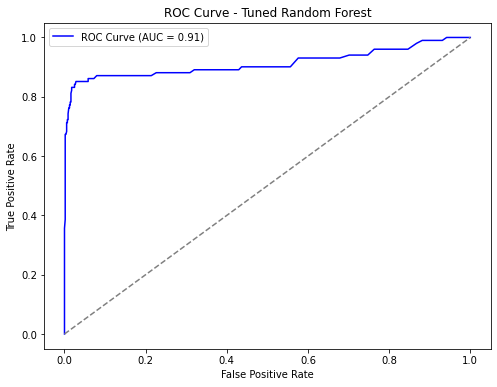

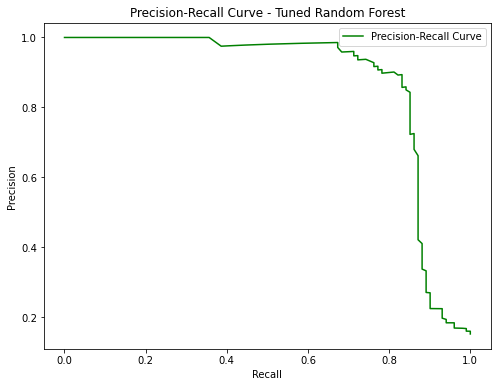

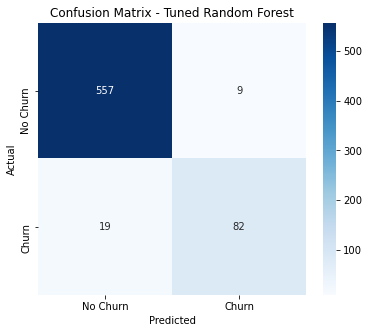

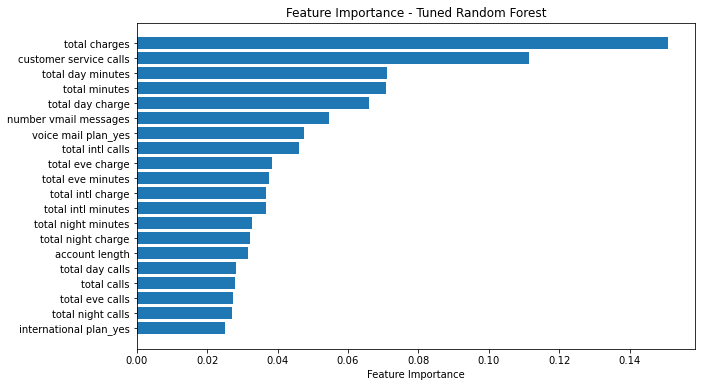

In [105]:
# Tuned Random Forest
print("Evaluating Tuned Random Forest...")
plot_roc_curve(best_rf, X_test, y_test, "Tuned Random Forest")
plot_pr_curve(best_rf, X_test, y_test, "Tuned Random Forest")
plot_confusion_matrix(best_rf, X_test, y_test, "Tuned Random Forest")
plot_feature_importance(best_rf, X_train_resampled, "Tuned Random Forest")


Evaluating Tuned XGBoost...


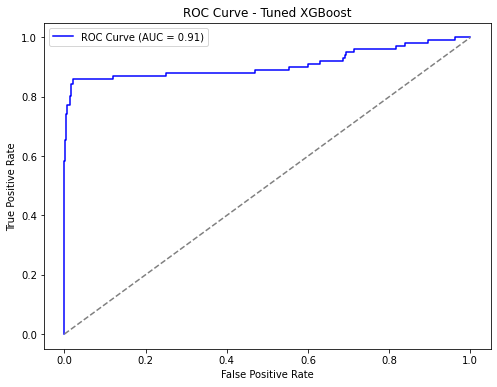

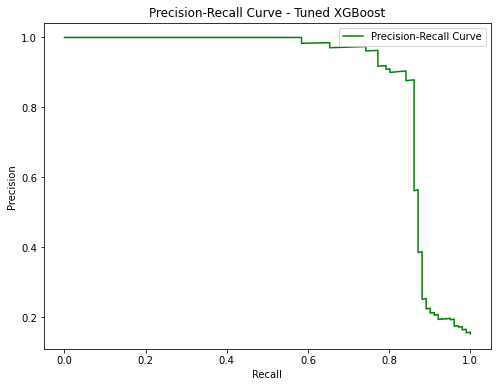

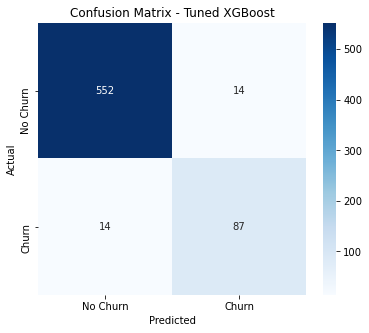

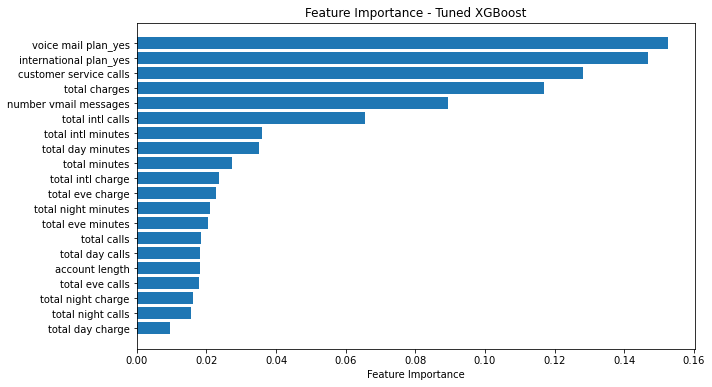

In [106]:
# Evaluate Tuned XGBoost
print("Evaluating Tuned XGBoost...")
plot_roc_curve(best_xgb, X_test, y_test, "Tuned XGBoost")
plot_pr_curve(best_xgb, X_test, y_test, "Tuned XGBoost")
plot_confusion_matrix(best_xgb, X_test, y_test, "Tuned XGBoost")
plot_feature_importance(best_xgb, X_train_resampled, "Tuned XGBoost")

### **Comparison: Tuned XGBoost vs. Tuned Random Forest**  
| Model  | Precision (Churn) | Recall (Churn) | F1-Score (Churn) | Accuracy |  
|--------|------------------|---------------|----------------|---------|  
| **Tuned Random Forest** | **72%** | **87%** | **79%** | **93%** |  
| **Tuned XGBoost** | **79%** | **86%** | **82%** | **94%** |  

#### **Key Observations**  
1. **Random Forest has slightly better recall (87% vs. 86%)**, meaning it identifies more actual churners.  
2. **XGBoost has significantly better precision (79% vs. 72%)**, meaning it reduces false positives and avoids unnecessary retention efforts.  
3. **XGBoost has a higher F1-score (82% vs. 79%)**, showing a better trade-off between precision and recall.  
4. **Overall Accuracy favors XGBoost (94% vs. 93%)**, indicating slightly better general performance.  

#### **Final Decision: Why XGBoost?**  
- **Business Goal:** We prioritize **high recall** but also need a good precision balance.  
- **Trade-Off:** Random Forest **catches more churners** but **has more false positives**, which could lead to wasted retention efforts.  
- **XGBoost offers a better balance** → It maintains **high recall (86%) while improving precision (79%)**, leading to **fewer false positives** and **more confident churn predictions**.  
- **F1-score confirms this** → XGBoost's 82% is **higher than Random Forest’s 79%**, meaning it provides a stronger overall performance.  


### **Final Model Selection Based on Evaluation**


1. ROC-AUC (0.91) is equal for both models, so they both effectively distinguish churners from non-churners. 


2. XGBoost captures more actual churners (87 vs. 82 True Positives), meaning fewer false negatives.


3. Random Forest makes fewer false churn predictions (9 vs. 14 False Positives), meaning fewer false alarms. 


4. XGBoost places higher importance on service plans (Voice Mail & International), while Random Forest relies more on Total Charges. 


5. Both models emphasize "Customer Service Calls" and "Total Charges," confirming their strong influence on churn.


**Since our priority is identifying churned customers, XGBoost remains the final model due to its high recall and lower false negatives.**  

#### **Verdict**  
Despite Random Forest’s slightly higher recall, XGBoost is the better final model because it achieves a strong balance between recall and precision, reducing both missed churners and false positives.

### Recommendations


- Enhance Customer Retention Strategies by proactively identifying high-risk customers with high total charges and frequent customer service calls, offering personalized incentives and discounts to retain them.  


- Optimize Service and Pricing Plans by addressing customer dissatisfaction linked to international and voicemail plans, improving service quality, and introducing competitive pricing adjustments.  


- Implement Data-Driven Churn Prevention by deploying the XGBoost model for real-time churn prediction, enabling proactive intervention before customers leave.  


- Refine and Expand Predictive Capabilities by optimizing the decision threshold for better precision-recall balance and integrating additional data sources like customer satisfaction and competitor offers for improved accuracy.